<font size=6><b>lec01.샤프지수 - 효율적투자선

# 샤프지수
* 리스크(std) vs 수익률(mean) 관계
* 포트폴리오 내에서 인내할 있는 리스크 대비 최대 수익률

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from pykrx import stock
import matplotlib.pyplot as plt

# Data Load

## yfinance

In [2]:
sdate = '2016-01-01'
edate = '2020-06-30'
# kkdf 035720
nvdf = yf.download("035420.KS", sdate, edate)['Close']
ssdf = yf.download("005930.KS", sdate, edate)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


* Close_Adj(수정종가)   : 액면분할된 가격으로 이전가격들을 재계산해서 보여줌
* Close(종가) : 원본가 그데로 보여줌

In [3]:
nvdf.head(1)

Date
2016-01-04    126400.0
Name: Close, dtype: float64

In [4]:
ssdf.tail(1)

Date
2020-06-29    52400.0
Name: Close, dtype: float64

## pykrx

In [5]:
def my_getdata(ticker='005930', sdate = '2016-01-01', edate = '2020-06-30'):
    return stock.get_market_ohlcv(sdate, edate , ticker)['종가']

df_list = []
df = pd.DataFrame()

ticker_list = [('kakao','035720'), ('naver','035420'), ('samsung','005930')]
for ticker in ticker_list:
    s = my_getdata(ticker[1])
    df[f"{ticker[0]}"] = s
print(df.shape)
df.head()

(1102, 3)


,kakao,naver,samsung
날짜,,,
2016-01-04,23142,126579,24100
2016-01-05,23503,127580,24160
2016-01-06,23905,124776,23500
2016-01-07,23544,130585,23260
2016-01-08,23122,130585,23420


In [6]:
dret = df.pct_change().mean()                  #일별 변동률
aret = df.pct_change().mean().dropna() *252    #년간 변동률
dcov = df.pct_change().cov()                   #일분산
acov = df.pct_change().cov() * 252             #년분산

weights_list = []
ret_list     = []
risk_list    = []
sharp_list   = []
for i in range(10000):
    w = np.random.rand(df.shape[1])  #포트에 편성할 종목 갯수 3개
    w = w / np.sum(w)
    weights_list.append(w)
    
    # 가중평균 수익률 (p1w1 + p2w2 ... pnwn) --> np.dot(p, wT) 
    ret = np.dot(aret, w)
    # [ 2.73729527, -0.72693649,  1.11944139, ...,  1.10893588,
    ret_list.append(ret)
    
    #risk(편차) =  np.sqrt(W.cov.WT)
    risk = np.sqrt(np.dot(w.T, np.dot(acov, w)))
    risk_list.append(risk)
    
    # 샤프 : (수익률-무위험수익률)/표준편차(리스크)
    sharp_list.append(ret / risk)  #
    
# print(weights_list, np.array(weights_list).shape)
# print(ret_list, np.array(ret_list).shape)
# print(risk_list, np.array(risk_list).shape)
# print(sharp_list, np.array(sharp_list).shape)

In [7]:
port_dict = {"ret":ret_list,"risk":risk_list,"sharp":sharp_list,"weight":weights_list}
port_df = pd.DataFrame(port_dict)
print(port_df.shape)
port_df.head()

(10000, 4)


,ret,risk,sharp,weight
0,0.228668,0.228826,0.999311,"[0.2493101294295078, 0.3775118159623701, 0.373..."
1,0.233497,0.242961,0.961046,"[0.4714293045429654, 0.007766357331101394, 0.5..."
2,0.237179,0.260376,0.910908,"[0.472776993877212, 0.40626653463226997, 0.120..."
3,0.230925,0.231520,0.997428,"[0.31796420937204645, 0.34706894047095127, 0.3..."
4,0.247651,0.310178,0.798415,"[0.818307157835517, 0.15589262369549345, 0.025..."


In [8]:
sharp_max = port_df[port_df['sharp'] == port_df['sharp'].max()]

In [9]:
risk_min = port_df[port_df['risk'] == port_df['risk'].min()]

In [10]:
ret_max = port_df[port_df['ret'] == port_df['ret'].max()]

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


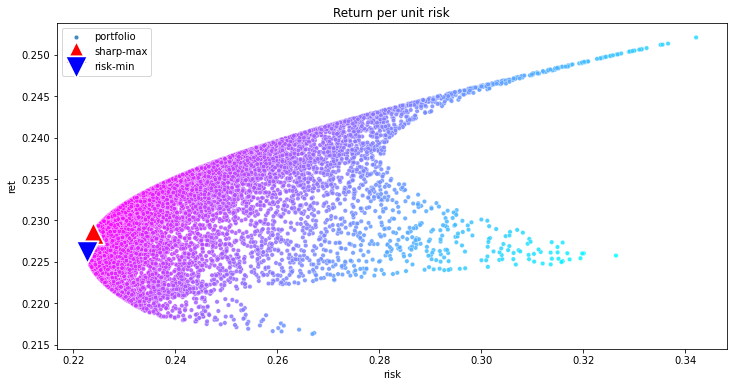

In [11]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.scatterplot(x=port_df['risk'], y=port_df['ret'], c=port_df['ret']/port_df['risk'], cmap='cool', alpha=0.85, s=20, label="portfolio")
sns.scatterplot(x=sharp_max['risk'], y=sharp_max['ret'], color='r', marker='^', s=500, label="sharp-max")
sns.scatterplot(x=risk_min['risk'], y=risk_min['ret'], color='b', marker='v', s=500, label="risk-min")
plt.title('Return per unit risk')
plt.legend()
plt.show()